# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Df

0.4 Preparatory work

    0.5.1 Subset df with each row = 1 user
    0.5.2 df_order_subset where each row = 1 order
    0.5.3 Random sample of 30% of the data


0.5 Defining styles, formats, and commonly used variables


0.6 Exploration of data by region

    0.6.1 Users - total, gender, income
    0.6.2 Items - total, avg by order
    0.6.3 Gross sales - total, avg by order
    0.6.4 Departmental totals, proportions
    0.6.5 Ordering habits - day of week, time of day, frequency


### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_all3.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all3.pkl'))

In [4]:
# Import data from 'dept_data.pkl'
dept_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'department_data.pkl'))

### 0.3 Exploring Original dfs

In [5]:
df.shape

(32434489, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 45 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   user_id                      int64         
 2   order_number                 int16         
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float16       
 6   first_order_of_new_customer  bool          
 7   product_id                   int32         
 8   add_to_cart_order            int16         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     float16       
 12  department_id                float16       
 13  price                        float32       
 14  product_info_available       bool          
 15  price_available              bool          
 16

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,income_group,senior_citizen,two_parent_fam,single_parent
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False


In [8]:
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
price_range                      35897
busiest_day                          0
busiest_days                         0
busiest_period_of_day                0
max_order                            0
loyalty_flag                         0
mean_spending                        0
spender_type                         0
median_days_since_ordering           0
frequent_shopper         

All nulls have been previously accounted for and labeled appropriately with flags.

In [9]:
dept_data.shape

(21, 8)

In [10]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   department                   21 non-null     category
 1   department_id                21 non-null     int8    
 2   total_items_sold_by_dept     21 non-null     int64   
 3   total_spent_in_dept          21 non-null     float32 
 4   avg_price_per_item_in_dept   21 non-null     float32 
 5   total_orders_from_dept       21 non-null     int32   
 6   avg_items_per_order_by_dept  21 non-null     float32 
 7   n_unique_items_in_dept       21 non-null     int16   
dtypes: category(1), float32(3), int16(1), int32(1), int64(1), int8(1)
memory usage: 924.0 bytes


In [11]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,17289206.00,7.736552,1180461,1.893110,4006
1,other,2,36291,253708.00,6.990934,35056,1.035229,548
2,bakery,3,1172428,9208026.00,7.853809,878658,1.334339,1515
3,produce,4,9479291,75660936.00,7.981709,2409320,3.934426,1684
4,alcohol,5,153696,1251654.25,8.143701,84689,1.814828,1054


In [12]:
dept_data.isnull().sum()

department                     0
department_id                  0
total_items_sold_by_dept       0
total_spent_in_dept            0
avg_price_per_item_in_dept     0
total_orders_from_dept         0
avg_items_per_order_by_dept    0
n_unique_items_in_dept         0
dtype: int64

### 0.4.1 Subset df with each row = 1 user

In [13]:
# Create a temporary df to use for visualizations that should be per user
# rather than per item ordered
df_user_subset = pd.DataFrame()

In [14]:
df_user_subset = df[['user_id', 
                     'loyalty_flag', 
                     'spender_type', 
                     'frequent_shopper', 
                     'gender', 'age', 
                     'n_dependants', 
                     'fam_status', 
                     'income', 
                     'income_group', 
                     'region', 
                     'low_activity_flag', 
                     'total_spent_in_lifetime', 
                     'total_items_in_lifetime', 
                     'avg_items_per_order_by_user', 
                     'median_days_since_ordering',
                     'baby_parent', 
                     'pet_owner', 
                     'senior_citizen', 
                     'two_parent_fam', 
                     'single_parent']]

In [15]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,...,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,median_days_since_ordering,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,...,False,375.700012,59,5.898438,20.0,False,False,False,True,False
1,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,...,False,375.700012,59,5.898438,20.0,False,False,False,True,False
2,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,...,False,375.700012,59,5.898438,20.0,False,False,False,True,False
3,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,...,False,375.700012,59,5.898438,20.0,False,False,False,True,False
4,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,...,False,375.700012,59,5.898438,20.0,False,False,False,True,False


In [16]:
df_user_subset.shape

(32434489, 21)

This has the same number of rows as the original df and only the 20 subsetted columns.

In [17]:
# Remove duplicate rows
df_user_subset = df_user_subset.drop_duplicates()

In [18]:
# Checking new shape
df_user_subset.shape

(206209, 21)

In [19]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,...,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,median_days_since_ordering,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,...,False,375.700012,59,5.898438,20.0,False,False,False,True,False
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,...,False,1465.599976,195,13.929688,13.0,False,False,True,True,False
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,...,False,721.400024,88,7.332031,11.0,False,False,False,True,False
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,...,False,147.699997,18,3.599609,17.0,False,False,False,True,False
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,...,True,340.000000,37,9.250000,11.0,False,False,True,False,False


Now we have a dataframe that reflects the users specifically.

### 0.4.2 Subset of df where each row = 1 order

In [20]:
# Create a temporary df to use for visualizations that should be per order
# rather than per item 
df_order_subset = pd.DataFrame()

In [21]:
df_order_subset = df[['order_id', 
                     'user_id', 
                     'order_day_of_week',
                     'order_hour_of_day',
                     'days_since_prior_order',
                     'first_order_of_new_customer',
                     'max_order', 
                     'loyalty_flag', 
                     'spender_type', 
                     'frequent_shopper', 
                     'gender', 
                     'age', 
                     'n_dependants', 
                     'fam_status', 
                     'income', 
                     'income_group', 
                     'region', 
                     'low_activity_flag', 
                     'total_spent_in_order', 
                     'total_spent_in_lifetime', 
                     'total_items_in_lifetime', 
                     'avg_items_per_order_by_user', 
                     'baby_parent', 
                     'pet_owner', 
                     'senior_citizen', 
                     'two_parent_fam', 
                     'single_parent']]

In [22]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
1,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
2,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
3,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
4,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False


In [23]:
df_order_subset.shape

(32434489, 27)

In [24]:
# Remove duplicate rows
df_order_subset = df_order_subset.drop_duplicates()

In [25]:
# Checking new shape
df_order_subset.shape

(3214874, 27)

In [26]:
# Confirming uniqueness of order_id s
df_order_subset['order_id'].nunique()

3214874

In [27]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.600000,375.700012,59,5.898438,False,False,False,True,False
5,2398795,1,3,7,15.0,False,10,New customer,Low spender,Regular customer,...,False,35.400002,375.700012,59,5.898438,False,False,False,True,False
11,473747,1,3,12,21.0,False,10,New customer,Low spender,Regular customer,...,False,28.200001,375.700012,59,5.898438,False,False,False,True,False
16,2254736,1,4,7,29.0,False,10,New customer,Low spender,Regular customer,...,False,26.000000,375.700012,59,5.898438,False,False,False,True,False
21,431534,1,4,15,28.0,False,10,New customer,Low spender,Regular customer,...,False,57.000000,375.700012,59,5.898438,False,False,False,True,False


Now we have a df with just the 3,214,874 orders each on their own row

In [28]:
# Let's add the number of items in each order to this df

# First we create a temp df to hold that information
temp = pd.DataFrame(df.groupby('order_id').add_to_cart_order.max())
temp.head()

,add_to_cart_order
order_id,
2,9
3,8
4,13
5,26
6,3


In [29]:
# Merge this data with the df_order_subset

df_order_subset = df_order_subset.merge(temp, on = ['order_id'], how='left', indicator = True)

In [30]:
# Confirming that all rows got a value
df_order_subset['_merge'].value_counts()

both          3214874
left_only           0
right_only          0
Name: _merge, dtype: int64

In [31]:
# Dropping the merge field as no longer necessary
df_order_subset = df_order_subset.drop(columns = '_merge')

In [32]:
# Rename column to be more meaningful for this df
df_order_subset = df_order_subset.rename(columns = {'add_to_cart_order':'n_items_in_order'})

In [33]:
# Confirming everything looks fine
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent,n_items_in_order
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,31.600000,375.700012,59,5.898438,False,False,False,True,False,5
1,2398795,1,3,7,15.0,False,10,New customer,Low spender,Regular customer,...,35.400002,375.700012,59,5.898438,False,False,False,True,False,6
2,473747,1,3,12,21.0,False,10,New customer,Low spender,Regular customer,...,28.200001,375.700012,59,5.898438,False,False,False,True,False,5
3,2254736,1,4,7,29.0,False,10,New customer,Low spender,Regular customer,...,26.000000,375.700012,59,5.898438,False,False,False,True,False,5
4,431534,1,4,15,28.0,False,10,New customer,Low spender,Regular customer,...,57.000000,375.700012,59,5.898438,False,False,False,True,False,8


### 0.4.3 Random sampling of 30% of data 

In [34]:
# Assign a random number between 0-1 to each row of the df
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [35]:
# Split the df into two samples
# big = 70% of df
# small = 30% of df
big = df[dev]
small = df[~dev]

In [36]:
# Compare the sample dfs to the original
len(df)

32434489

In [37]:
len(big) + len(small)

32434489

This random sampling can be used for any line charts where using the full df would be too memory-intensive.

### 0.5 Defining styles and label formats

In [38]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [39]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [40]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

In [41]:
# Turning off the scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [42]:
# Setting up some commonly needed variables

# Calculating the gross sales for the entire df
total_gross=df['price'].sum()
total_gross

252418420.0

In [43]:
# Calculating the total items for the entire df
total_items=len(df)
total_items

32434489

In [44]:
# Calculating the total users 
total_users=len(df_user_subset)
total_users

206209

In [45]:
# Calculating the total orders 
total_orders=len(df_order_subset)
total_orders

3214874

### 0.6 Exploration of data by loyalty_flag

In [46]:
# Identifying which profile we are investigating
profile = 'loyalty_flag'
profile_label = 'Loyalty Status'
labels_inc = ['New customer', 'Regular customer', 'Loyal customer']
labels_dec = ['Loyal customer',  'Regular customer', 'New customer']
labels = ['Loyal customer', 'New customer', 'Regular customer']
colors_dec = ['darkgreen', 'mediumseagreen', '#C5EFBB']

#### 0.6.1 - Users - total, gender, age, income

In [67]:
# Calculating the count of users with each flag
user_count = pd.DataFrame(df_user_subset[profile].value_counts())
user_count

,loyalty_flag
New customer,112328
Regular customer,76864
Loyal customer,17017


In [70]:
users_by_loyalty = pd.DataFrame(df_user_subset[profile].value_counts())

In [68]:
# Calculating the percent of users with each flag
users_by_loyalty['percent_loyal'] = user_count/total_users

In [69]:
users_by_loyalty

,loyalty_flag,percent_loyal
New customer,112328,0.54
Regular customer,76864,0.37
Loyal customer,17017,0.08


Text(0.5, 1.0, "Only 8% of our customers are 'loyal customers'\n meaning they have 40+ orders.")

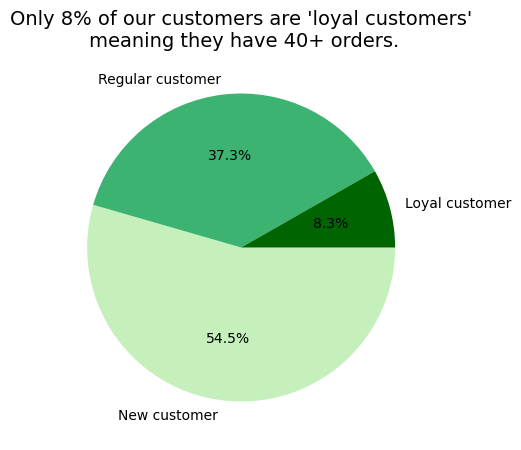

In [46]:
loyal_pie = users_by_loyalty.plot.pie(y='loyalty_flag', 
                            figsize=(7,5), 
                            counterclock=False, 
                            colors =['#C5EFBB', 'mediumseagreen', 'darkgreen'],
                            legend=False, 
                            labels = labels_inc, 
                            autopct='%1.1f%%')
plt.ylabel("")

plt.title ("Only 8% of our customers are 'loyal customers'\n meaning they have 40+ orders.", 
          size=14)

In [47]:
# Create filename for export
filename = profile+'_pie.png'
filename

'loyalty_flag_pie.png'

In [48]:
# Exporting bar chart
loyal_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [49]:
# Checking the distribution of genders by profile
gender_count = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['gender'],
                            normalize='index')
gender_count

gender,Female,Male
loyalty_flag,,
Loyal customer,0.49,0.51
New customer,0.49,0.51
Regular customer,0.50,0.50


In [53]:
# Checking the distribution of incomes by profile
income_count = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['income_group'],
                            normalize='index')
income_count

income_group,Affluent,Low income,Middle class,Upper middle class
loyalty_flag,,,,
Loyal customer,0.01,0.12,0.75,0.12
New customer,0.00,0.19,0.71,0.10
Regular customer,0.00,0.14,0.74,0.12


In [84]:
# Checking the distribution of profiles by income_group
income_prof_count = pd.crosstab(index=df_user_subset['income_group'],
                            columns=df_user_subset[profile],
                            normalize='index')
income_prof_count

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Affluent,0.15,0.34,0.51
Low income,0.06,0.61,0.33
Middle class,0.09,0.53,0.38
Upper middle class,0.09,0.52,0.39


In [101]:
# Move 'low income' to the end of the df so the chart renders correctly
# First create a temp df copy
temp = pd.DataFrame(income_prof_count.copy())

In [102]:
temp

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Affluent,0.15,0.34,0.51
Low income,0.06,0.61,0.33
Middle class,0.09,0.53,0.38
Upper middle class,0.09,0.52,0.39


In [103]:
# Drop the unneeded rows
temp = temp.drop(labels = ['Affluent', 'Middle class', 'Upper middle class'], axis = 0)

In [104]:
temp

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Low income,0.06,0.61,0.33


In [105]:
# Drop 'Low income' in the original df
income_prof_count_sort = income_prof_count.drop(labels='Low income', axis=0)

In [106]:
income_prof_count_sort

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Affluent,0.15,0.34,0.51
Middle class,0.09,0.53,0.38
Upper middle class,0.09,0.52,0.39


In [91]:
# Add 'Low income' back in at the end of the original df
income_prof_count_sort_2 = pd.concat([income_prof_count_sort, temp], ignore_index=False)

In [92]:
income_prof_count_sort_2

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Affluent,0.15,0.34,0.51
Middle class,0.09,0.53,0.38
Upper middle class,0.09,0.52,0.39
Low income,0.06,0.61,0.33


In [124]:
# Create a cross tabulation with just the counts
cross_tab = pd.crosstab(index=df_user_subset['income_group'],
                       columns=df_user_subset['loyalty_flag'])

cross_tab

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Affluent,102,240,355
Low income,2127,20875,11103
Middle class,12782,79506,56565
Upper middle class,2006,11707,8841


In [125]:
# Move 'low income' to the end of the df so the chart renders correctly
# First create a temp df copy
temp2 = pd.DataFrame(cross_tab.copy())
temp2

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Affluent,102,240,355
Low income,2127,20875,11103
Middle class,12782,79506,56565
Upper middle class,2006,11707,8841


In [126]:
# Drop the unneeded rows
temp2 = temp2.drop(labels = ['Affluent', 'Middle class', 'Upper middle class'], axis = 0)
temp2

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Low income,2127,20875,11103


In [127]:
# Drop 'Low income' in the original df
cross_tab = cross_tab.drop(labels='Low income', axis=0)
cross_tab

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Affluent,102,240,355
Middle class,12782,79506,56565
Upper middle class,2006,11707,8841


In [128]:
# Add 'Low income' back in at the end of the original df
cross_tab = pd.concat([cross_tab, temp2], ignore_index=False)

In [129]:
cross_tab

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Affluent,102,240,355
Middle class,12782,79506,56565
Upper middle class,2006,11707,8841
Low income,2127,20875,11103


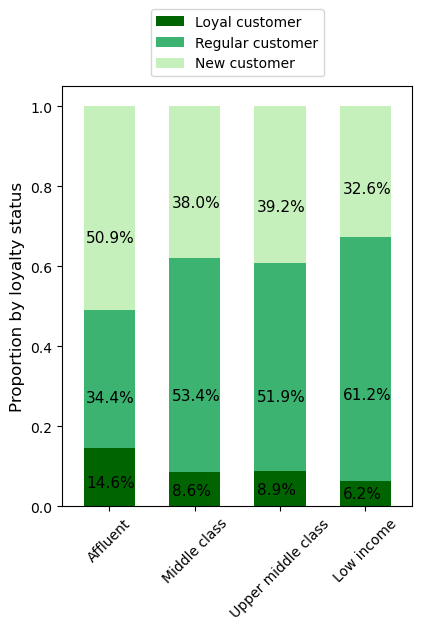

In [163]:
# Creating a font color list for the chart
col = ['black', 'black', 'white']

# Create a bar chart showing when different loyalty groups shop most often
income_bar_by_loyalty = income_prof_count_sort_2.plot(kind='bar', 
                                               stacked=True,
                                               width=0.6, 
                                               color = colors_dec,
                                               figsize=(5,7))

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity
plt.ylabel('Proportion by loyalty status', size=12)
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(labels = labels_dec, 
           bbox_to_anchor=(0.5, 1.2), 
           loc='upper center', 
           ncol=1)
#plt.title ("Out of the 1% of users who are affluent, \n15% of affluent users are loyal customers.\n", size=14)


#Create a loop to add the percentages to the plot
for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(income_prof_count_sort_2.loc[x],
                                   income_prof_count_sort_2.loc[x].cumsum()):
                
        plt.text(x=n - 0.27,
                 y=(y_loc - proportion) + (proportion / 3),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color= 'black',
                 fontsize=11,
                 )

plt.show()

In [164]:
# Create filename for export
filename = profile+'_income_group_stacked_bar.png'
filename

'loyalty_flag_income_group_stacked_bar.png'

In [165]:
# Exporting bar chart
income_bar_by_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

#### 0.6.2 Items - total, avg by order

In [58]:
# Create a temp df to calculate items ordered by loyalty_flag
item_count = pd.DataFrame(df[profile].value_counts())

In [59]:
item_count

,loyalty_flag
Regular customer,15891172
Loyal customer,10293959
New customer,6249358


In [60]:
item_percent = pd.DataFrame(item_count/total_items)
item_percent

,loyalty_flag
Regular customer,0.49
Loyal customer,0.32
New customer,0.19


In [71]:
# Compare items per user
items_per_user = pd.DataFrame(item_count/user_count)
items_per_user

,loyalty_flag
Loyal customer,604.92
New customer,55.63
Regular customer,206.74


In [72]:
avg_order = df_order_subset.groupby(profile).n_items_in_order.mean()
avg_order

loyalty_flag
Loyal customer     10.05
New customer        9.81
Regular customer   10.23
Name: n_items_in_order, dtype: float64

#### 0.6.3 Gross sales - total, avg by order

In [54]:
# Create a temp df to calculate gross by loyalty_flag
gross_by_loyalty = pd.DataFrame(df.groupby(profile).price.sum())

In [55]:
gross_by_loyalty

,price
loyalty_flag,
Loyal customer,"79,932,904.00"
New customer,"48,699,416.00"
Regular customer,"123,786,056.00"


In [56]:
# Rename column to be more desciptive
gross_by_loyalty.rename(columns={'price':'gross_sales'}, inplace=True)

In [57]:
gross_by_loyalty

,gross_sales
loyalty_flag,
Loyal customer,"79,932,904.00"
New customer,"48,699,416.00"
Regular customer,"123,786,056.00"


In [58]:
# I want to swap the order of the rows so that the 
# chart sequences bars correctly

# First reset the index to allow swapping the loyalty_flag as well
gross_by_loyalty = gross_by_loyalty.reset_index()

gross_by_loyalty

,loyalty_flag,gross_sales
0,Loyal customer,"79,932,904.00"
1,New customer,"48,699,416.00"
2,Regular customer,"123,786,056.00"


In [59]:
# Create a temp copy of the df
temp = pd.DataFrame()
temp = gross_by_loyalty.copy()
temp

,loyalty_flag,gross_sales
0,Loyal customer,"79,932,904.00"
1,New customer,"48,699,416.00"
2,Regular customer,"123,786,056.00"


In [60]:
# Swap the last two rows
gross_by_loyalty.iloc[1] = temp.iloc[2].copy()
gross_by_loyalty.iloc[2] = temp.iloc[1].copy()

In [61]:
gross_by_loyalty

,loyalty_flag,gross_sales
0,Loyal customer,"79,932,904.00"
1,Regular customer,"123,786,056.00"
2,New customer,"48,699,416.00"


In [62]:
# Return the index to being the loyalty_flag
gross_by_loyalty = gross_by_loyalty.set_index('loyalty_flag')

In [63]:
gross_by_loyalty

,gross_sales
loyalty_flag,
Loyal customer,"79,932,904.00"
Regular customer,"123,786,056.00"
New customer,"48,699,416.00"


In [64]:
# Create a df with the percent of gross
gross_percent_by_loyalty = round(((gross_by_loyalty/252418380)*100),2)

In [65]:
gross_percent_by_loyalty

,gross_sales
loyalty_flag,
Loyal customer,31.67
Regular customer,49.04
New customer,19.29


In [66]:
# Rename column to be more desciptive and adjust datatype
gross_percent_by_loyalty.rename(columns={'gross_sales':'gross_percent'}, inplace=True)

In [67]:
# Format the percents appropriately
gross_percent_by_loyalty['gross_percent']=gross_percent_by_loyalty['gross_percent'].map('{:,.1f}%'.format)

In [68]:
gross_percent_by_loyalty

,gross_percent
loyalty_flag,
Loyal customer,31.7%
Regular customer,49.0%
New customer,19.3%


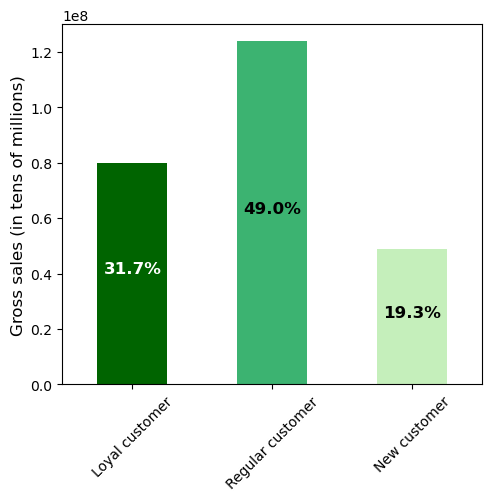

In [69]:
# define x and y to be plotted
x = labels_dec
y = gross_by_loyalty['gross_sales']
z = gross_percent_by_loyalty['gross_percent']
col = ['white', 'black', 'black']

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, z[i], 
                 ha='center', 
                 fontweight='bold', 
                 size=12, 
                 color=col[i])


# Make a bar chart for size_of_orders
loyalty_bar = gross_by_loyalty['gross_sales'].plot(kind='bar',
                                           color = ['darkgreen', 'mediumseagreen', '#C5EFBB'], 
                                           figsize=(6,6))
# call the function to add value labels
addlabels(x,y)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity

plt.ylabel('Gross sales (in tens of millions)', size=12)
plt.xlabel('')
plt.xticks(rotation=45)

#plt.title ("The 8% of users who are loyal customers are\nresponsible for over 30% of our gross sales.\n", size=16)

plt.show()

In [70]:
# Create filename for export
filename = profile+'_gross.png'
filename

'loyalty_flag_gross.png'

In [71]:
# Exporting bar chart
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [73]:
avg_order_gross_by_profile = df_order_subset.groupby(profile).total_spent_in_order.mean()
avg_order_gross_by_profile

loyalty_flag
Loyal customer     78.02
New customer       76.44
Regular customer   79.70
Name: total_spent_in_order, dtype: float32

#### 0.6.4 Department totals, proportions

Checking to see if loyalty status affects departmental prefences

In [72]:
gross_by_loyalty_dept = pd.DataFrame(df.groupby(['loyalty_flag', 'department_id']).price.sum())

In [73]:
gross_by_loyalty_dept

price
loyalty_flag     department_id              
Loyal customer   1.00           4,670,452.00
                 2.00              72,252.70
                 3.00           2,994,648.50
                 4.00          25,023,814.00
                 5.00             315,957.31
...                                      ...
Regular customer 17.00          2,764,676.50
                 18.00          1,508,023.25
                 19.00          6,035,369.50
                 20.00          4,052,222.25
                 21.00            293,977.91

[63 rows x 1 columns]

In [74]:
# Rename column to be more desciptive
gross_by_loyalty_dept.rename(columns={'price':'gross_sales'}, inplace=True)

In [75]:
# Reset the index so the correct column headers will appear
gross_by_loyalty_dept = gross_by_loyalty_dept.reset_index()

In [76]:
gross_by_loyalty_dept

,loyalty_flag,department_id,gross_sales
0,Loyal customer,1.00,"4,670,452.00"
1,Loyal customer,2.00,"72,252.70"
2,Loyal customer,3.00,"2,994,648.50"
3,Loyal customer,4.00,"25,023,814.00"
4,Loyal customer,5.00,"315,957.31"
...,...,...,...
58,Regular customer,17.00,"2,764,676.50"
59,Regular customer,18.00,"1,508,023.25"
60,Regular customer,19.00,"6,035,369.50"
61,Regular customer,20.00,"4,052,222.25"


In [77]:
# Pulling each of the loyalty groups into their own temp dataframe to allow
# reformatting data so they'll play nice with visualizations

loyal_gross = pd.DataFrame(gross_by_loyalty_dept[gross_by_loyalty_dept[profile]=='Loyal customer'])
reg_gross = pd.DataFrame(gross_by_loyalty_dept[gross_by_loyalty_dept[profile]=='Regular customer'])
new_gross = pd.DataFrame(gross_by_loyalty_dept[gross_by_loyalty_dept[profile]=='New customer'])

In [78]:
# Rename columns to be more desciptive
loyal_gross.rename(columns={'gross_sales':'loyal_gross'}, inplace=True)
reg_gross.rename(columns={'gross_sales':'reg_gross'}, inplace=True)
new_gross.rename(columns={'gross_sales':'new_gross'}, inplace=True)

In [79]:
new_gross

,loyalty_flag,department_id,new_gross
21,New customer,1.00,"3,778,499.50"
22,New customer,2.00,"56,390.40"
23,New customer,3.00,"1,744,769.88"
24,New customer,4.00,"13,909,601.00"
25,New customer,5.00,"306,614.41"
26,New customer,6.00,"440,507.31"
27,New customer,7.00,"3,913,889.25"
28,New customer,8.00,"162,499.41"
29,New customer,9.00,"1,397,585.25"
30,New customer,10.00,"44,030.10"


In [80]:
# Removing unnecessary columns
loyal_gross = loyal_gross.drop(columns = [profile])
reg_gross = reg_gross.drop(columns = [profile])
new_gross = new_gross.drop(columns = [profile])

In [81]:
# Merge temp dfs
combo_gross_by_flag = loyal_gross.merge(reg_gross, on = 'department_id', how='left')

In [82]:
combo_gross_by_flag = combo_gross_by_flag.merge(new_gross, on = 'department_id', how='left')

In [83]:
# Merge dept name to allow for easier visualizations
combo_gross_by_flag = pd.merge(combo_gross_by_flag, dept_data[['department_id', 'department']], on = ['department_id'], how='left')

In [84]:
# Set the department name to be used as the index
combo_gross_by_flag = combo_gross_by_flag.set_index('department')

In [85]:
# Drop the department_id column so it doesn't interfere with visualizations
combo_gross_by_flag = combo_gross_by_flag.drop(columns = ['department_id'])

In [86]:
# Sort departments by alphabetical order for more consistent look to axes
combo_gross_by_flag_sort = combo_gross_by_flag.sort_values('department', ascending=False)

In [87]:
combo_gross_by_flag_sort

,loyal_gross,reg_gross,new_gross
department,,,
snacks,"4,026,833.75","6,035,369.50","2,283,335.00"
produce,"25,023,814.00","36,727,520.00","13,909,601.00"
pets,"199,741.80","408,647.19","162,499.41"
personal care,"988,070.88","1,799,356.88","785,744.88"
pantry,"4,533,079.50","7,373,324.00","3,114,257.25"
other,"72,252.70","125,064.90","56,390.40"
missing,"157,433.91","293,977.91","147,433.41"
meat seafood,"3,300,634.00","5,867,933.50","2,383,002.75"
international,"599,437.31","1,028,528.12","440,507.31"


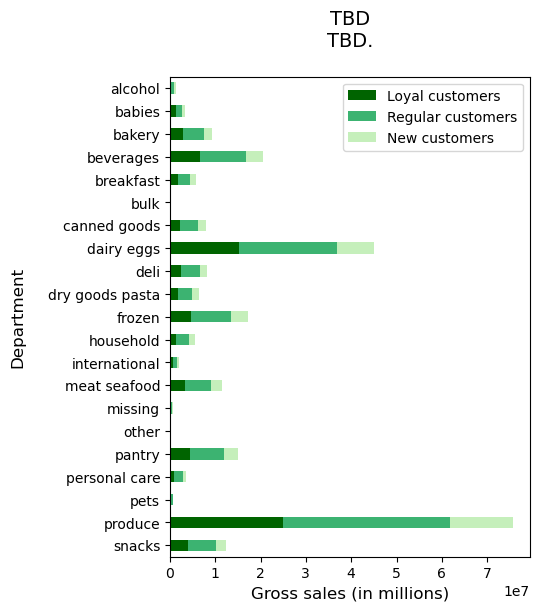

In [88]:
# Create a stacked column plot showing the proportion 
# of sales for each price_range in each dept.

loyalty_dept_plot = combo_gross_by_flag_sort.plot(kind='barh',
                   stacked=True,
                   figsize=(6,8),
                   color=['darkgreen', 'mediumseagreen', '#C5EFBB'])

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.3)

# Format labels and titles for clarity
plt.legend(['Loyal customers', 'Regular customers', 'New customers'], 
           loc='upper right', ncol=1)
plt.xlabel('Gross sales (in millions)', size=12)
plt.ylabel('Department\n', size=12)
plt.title('TBD\nTBD.\n',
         size=14)
        
plt.show()

##### Creating a proportional visualization

In [89]:
# Merging the total per department to create a table of proportions/percents
# of gross sales by price_range
combo_gross_by_dept_prop = pd.merge(combo_gross_by_flag_sort, dept_data[['department', 'total_spent_in_dept']], on = ['department'], how='left')

In [90]:
# Set the department name to be used as the index
combo_gross_by_dept_prop = combo_gross_by_dept_prop.set_index('department')

In [91]:
combo_gross_by_dept_prop.head()

,loyal_gross,reg_gross,new_gross,total_spent_in_dept
department,,,,
snacks,"4,026,833.75","6,035,369.50","2,283,335.00","12,345,538.00"
produce,"25,023,814.00","36,727,520.00","13,909,601.00","75,660,936.00"
pets,"199,741.80","408,647.19","162,499.41","770,888.38"
personal care,"988,070.88","1,799,356.88","785,744.88","3,573,172.75"
pantry,"4,533,079.50","7,373,324.00","3,114,257.25","15,020,661.00"


In [92]:
# Creating proportional fields
combo_gross_by_dept_prop['loyal_prop'] = combo_gross_by_dept_prop['loyal_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop['reg_prop'] = combo_gross_by_dept_prop['reg_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop['new_prop'] = combo_gross_by_dept_prop['new_gross']/combo_gross_by_dept_prop['total_spent_in_dept']

In [93]:
# Drop the columns that are no longer needed
combo_gross_by_dept_prop = combo_gross_by_dept_prop.drop(columns = ['loyal_gross', 'reg_gross', 'new_gross', 'total_spent_in_dept' ])


In [94]:
combo_gross_by_dept_prop

,loyal_prop,reg_prop,new_prop
department,,,
snacks,0.33,0.49,0.18
produce,0.33,0.49,0.18
pets,0.26,0.53,0.21
personal care,0.28,0.50,0.22
pantry,0.30,0.49,0.21
other,0.28,0.49,0.22
missing,0.26,0.49,0.25
meat seafood,0.29,0.51,0.21
international,0.29,0.50,0.21


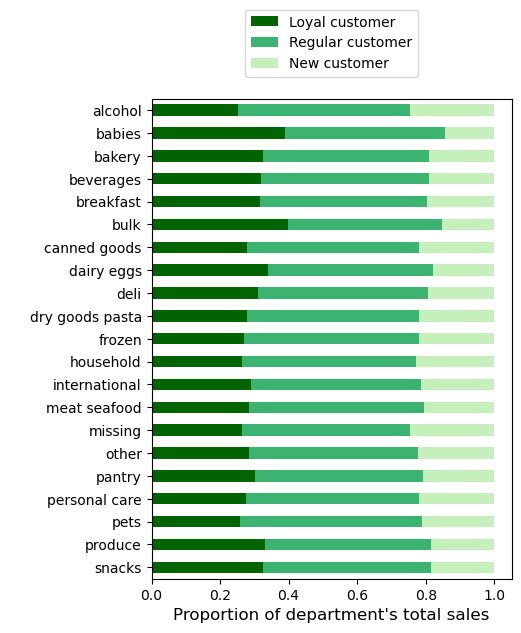

In [95]:
# Create a bar plot showing the proportion 
# of each loyalty group in the gross sales for the dept.

loyalty_dept_prop_plot = combo_gross_by_dept_prop.plot(kind='barh',
                   stacked=True,
                   figsize=(6,8),
                   color=['darkgreen', 'mediumseagreen', '#C5EFBB'])

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.3)

# Format labels and titles for clarity
plt.legend(labels_dec, bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=1)
plt.xticks()
plt.xlabel('Proportion of department\'s total sales', size=12)
plt.ylabel(' ')
        
plt.show()

In [96]:
# Create filename for export
filename = profile+'_prop_dept.png'
filename

'loyalty_flag_prop_dept.png'

In [97]:
# Exporting bar chart
loyalty_dept_prop_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [98]:
# Sorting df to emphasize top 5 for each loyalty group
combo_gross_by_dept_sort = combo_gross_by_dept_prop.sort_values('loyal_prop', ascending=False)

In [99]:
combo_gross_by_dept_sort

,loyal_prop,reg_prop,new_prop
department,,,
bulk,0.40,0.45,0.15
babies,0.39,0.47,0.14
dairy eggs,0.34,0.48,0.18
produce,0.33,0.49,0.18
snacks,0.33,0.49,0.18
bakery,0.33,0.49,0.19
beverages,0.32,0.49,0.19
breakfast,0.32,0.49,0.20
deli,0.31,0.50,0.19


In [100]:
# Sorting df to emphasize top 5 for each loyalty group
loyal_gross_sort = loyal_gross.sort_values('loyal_gross', ascending=False)
reg_gross_sort = reg_gross.sort_values('reg_gross', ascending=False)
new_gross_sort = new_gross.sort_values('new_gross', ascending=False)

In [101]:
#Merge dept names for easier comparison
loyal_gross_sort = pd.merge(loyal_gross_sort, dept_data[['department_id', 'department']], on = ['department_id'], how='left')
reg_gross_sort = pd.merge(reg_gross_sort, dept_data[['department_id', 'department']], on = ['department_id'], how='left')
new_gross_sort = pd.merge(new_gross_sort, dept_data[['department_id', 'department']], on = ['department_id'], how='left')

In [102]:
loyal_gross_sort.head()

,department_id,loyal_gross,department
0,4.00,"25,023,814.00",produce
1,16.00,"15,290,767.00",dairy eggs
2,7.00,"6,593,009.50",beverages
3,1.00,"4,670,452.00",frozen
4,13.00,"4,533,079.50",pantry


In [103]:
reg_gross_sort.head()

,department_id,reg_gross,department
0,4.00,"36,727,520.00",produce
1,16.00,"21,598,670.00",dairy eggs
2,7.00,"10,139,185.00",beverages
3,1.00,"8,840,255.00",frozen
4,13.00,"7,373,324.00",pantry


In [104]:
new_gross_sort.head()

,department_id,new_gross,department
0,4.00,"13,909,601.00",produce
1,16.00,"8,065,057.50",dairy eggs
2,7.00,"3,913,889.25",beverages
3,1.00,"3,778,499.50",frozen
4,13.00,"3,114,257.25",pantry


#### 0.6.5 Ordering habits - day of week, time of day, frequency

In [105]:
#Comparing day of the week by loyalty status
day_loyalty = pd.DataFrame(df_order_subset.groupby('loyalty_flag').order_day_of_week.value_counts().sort_index())

In [106]:
day_loyalty

order_day_of_week
loyalty_flag     order_day_of_week                   
Loyal customer   0                             154529
                 1                             181004
                 2                             145026
                 3                             139254
                 4                             138177
                 5                             146200
                 6                             120381
New customer     0                             120379
                 1                             107387
                 2                              86447
                 3                              79765
                 4                              75387
                 5                              79782
                 6                              87954
Regular customer 0                             282864
                 1                             268314
                 2                             210482
                 3                             193381
                 4                             187648
                 5                             200000
                 6                             210513

In [107]:
day_loyalty.shape

(21, 1)

In [108]:
# Rename second column to be more meaningful
day_loyalty = day_loyalty.rename(columns={'order_day_of_week':'dow_count'})

In [109]:
day_loyalty

dow_count
loyalty_flag     order_day_of_week           
Loyal customer   0                     154529
                 1                     181004
                 2                     145026
                 3                     139254
                 4                     138177
                 5                     146200
                 6                     120381
New customer     0                     120379
                 1                     107387
                 2                      86447
                 3                      79765
                 4                      75387
                 5                      79782
                 6                      87954
Regular customer 0                     282864
                 1                     268314
                 2                     210482
                 3                     193381
                 4                     187648
                 5                     200000
                 6                     210513

In [110]:
# Reset the index so the column headers show up correctly
day_loyalty = day_loyalty.reset_index()

In [111]:
day_loyalty

,loyalty_flag,order_day_of_week,dow_count
0,Loyal customer,0,154529
1,Loyal customer,1,181004
2,Loyal customer,2,145026
3,Loyal customer,3,139254
4,Loyal customer,4,138177
5,Loyal customer,5,146200
6,Loyal customer,6,120381
7,New customer,0,120379
8,New customer,1,107387
9,New customer,2,86447


In [112]:
day_loyalty.shape

(21, 3)

In [113]:
# Calculating the total orders by loyalty status
day_loyalty.loc[day_loyalty['loyalty_flag']=='Loyal customer', 'total_orders'] = day_loyalty[day_loyalty['loyalty_flag']=='Loyal customer'].dow_count.sum()
day_loyalty.loc[day_loyalty['loyalty_flag']=='Regular customer', 'total_orders'] = day_loyalty[day_loyalty['loyalty_flag']=='Regular customer'].dow_count.sum()
day_loyalty.loc[day_loyalty['loyalty_flag']=='New customer', 'total_orders'] = day_loyalty[day_loyalty['loyalty_flag']=='New customer'].dow_count.sum()

day_loyalty

,loyalty_flag,order_day_of_week,dow_count,total_orders
0,Loyal customer,0,154529,"1,024,571.00"
1,Loyal customer,1,181004,"1,024,571.00"
2,Loyal customer,2,145026,"1,024,571.00"
3,Loyal customer,3,139254,"1,024,571.00"
4,Loyal customer,4,138177,"1,024,571.00"
5,Loyal customer,5,146200,"1,024,571.00"
6,Loyal customer,6,120381,"1,024,571.00"
7,New customer,0,120379,"637,101.00"
8,New customer,1,107387,"637,101.00"
9,New customer,2,86447,"637,101.00"


In [114]:
# Calculating the percent of order by day by loyalty status
day_loyalty['percent_of_total_by_flag'] = (day_loyalty['dow_count']/day_loyalty['total_orders'])*100
day_loyalty

,loyalty_flag,order_day_of_week,dow_count,total_orders,percent_of_total_by_flag
0,Loyal customer,0,154529,"1,024,571.00",15.08
1,Loyal customer,1,181004,"1,024,571.00",17.67
2,Loyal customer,2,145026,"1,024,571.00",14.15
3,Loyal customer,3,139254,"1,024,571.00",13.59
4,Loyal customer,4,138177,"1,024,571.00",13.49
5,Loyal customer,5,146200,"1,024,571.00",14.27
6,Loyal customer,6,120381,"1,024,571.00",11.75
7,New customer,0,120379,"637,101.00",18.89
8,New customer,1,107387,"637,101.00",16.86
9,New customer,2,86447,"637,101.00",13.57


In [115]:
# Creating three temp dfs to use for bar chart
loyal_dow_percent = day_loyalty.loc[day_loyalty['loyalty_flag'] =='Loyal customer', ['order_day_of_week', 'percent_of_total_by_flag']]    
reg_dow_percent = day_loyalty.loc[day_loyalty['loyalty_flag'] =='Regular customer', ['order_day_of_week', 'percent_of_total_by_flag']]    
new_dow_percent = day_loyalty.loc[day_loyalty['loyalty_flag'] =='New customer', ['order_day_of_week', 'percent_of_total_by_flag']]      

In [116]:
# Use order_day_of_week as index
loyal_dow_percent = loyal_dow_percent.set_index('order_day_of_week')
reg_dow_percent = reg_dow_percent.set_index('order_day_of_week')
new_dow_percent = new_dow_percent.set_index('order_day_of_week')

In [117]:
# Name columns to be distinctive
loyal_dow_percent = loyal_dow_percent.rename(columns={'percent_of_total_by_flag':'loyal_dow_perc'})
reg_dow_percent = reg_dow_percent.rename(columns={'percent_of_total_by_flag':'reg_dow_perc'})
new_dow_percent = new_dow_percent.rename(columns={'percent_of_total_by_flag':'new_dow_perc'})

In [118]:
# Merge back into one df for visualization
combo_dow_percent = pd.merge(loyal_dow_percent, reg_dow_percent, on='order_day_of_week', how='left' )

In [119]:
combo_dow_percent = pd.merge(combo_dow_percent, new_dow_percent, on='order_day_of_week', how='left')

In [120]:
combo_dow_percent

,loyal_dow_perc,reg_dow_perc,new_dow_perc
order_day_of_week,,,
0,15.08,18.21,18.89
1,17.67,17.27,16.86
2,14.15,13.55,13.57
3,13.59,12.45,12.52
4,13.49,12.08,11.83
5,14.27,12.88,12.52
6,11.75,13.55,13.81


In [121]:
combo_dow_percent.describe()

,loyal_dow_perc,reg_dow_perc,new_dow_perc
count,7.00,7.00,7.00
mean,14.29,14.29,14.29
std,1.81,2.44,2.61
min,11.75,12.08,11.83
25%,13.54,12.66,12.52
50%,14.15,13.55,13.57
75%,14.68,15.41,15.33
max,17.67,18.21,18.89


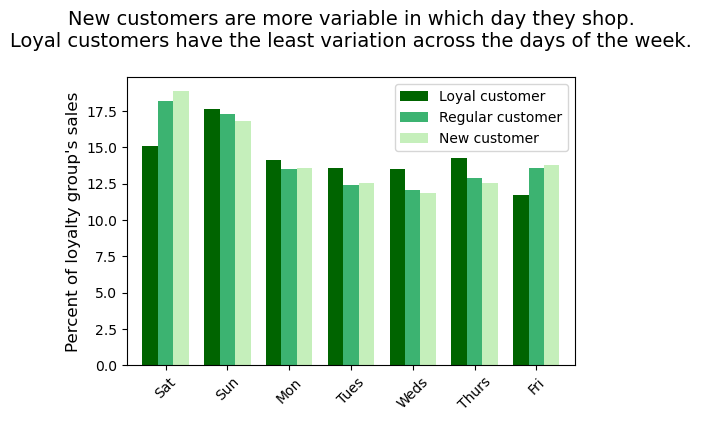

In [122]:
# Create a bar chart showing when different loyalty groups shop most often
dow_bar_by_loyalty = combo_dow_percent.plot(kind='bar', width=0.75, color = colors_dec)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity
plt.ylabel('Percent of loyalty group\'s sales', size=12)
plt.xticks(dow_xticks, dow, rotation = 45)
plt.xlabel(" ")
plt.xticks(rotation=45)
plt.legend(labels = labels_dec)
plt.title ("New customers are more variable in which day they shop.\nLoyal customers have the least variation across the days of the week.\n", size=14)

plt.show()


In [123]:
# Create filename for export
filename = profile+'_dow.png'
filename

'loyalty_flag_dow.png'

In [124]:
# Exporting bar chart
dow_bar_by_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

#### Loyalty groups ordering by time of day

In [74]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent,n_items_in_order
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,31.60,375.70,59,5.90,False,False,False,True,False,5
1,2398795,1,3,7,15.00,False,10,New customer,Low spender,Regular customer,...,35.40,375.70,59,5.90,False,False,False,True,False,6
2,473747,1,3,12,21.00,False,10,New customer,Low spender,Regular customer,...,28.20,375.70,59,5.90,False,False,False,True,False,5
3,2254736,1,4,7,29.00,False,10,New customer,Low spender,Regular customer,...,26.00,375.70,59,5.90,False,False,False,True,False,5
4,431534,1,4,15,28.00,False,10,New customer,Low spender,Regular customer,...,57.00,375.70,59,5.90,False,False,False,True,False,8


In [75]:
# Creating three-column subset of the 30% df
df_loy_flag = pd.DataFrame(df_order_subset.groupby(['loyalty_flag', 'order_hour_of_day']).total_spent_in_order.sum())

In [76]:
# First reset the index for manipulation of data
df_loy_flag = df_loy_flag.reset_index()

In [77]:
df_loy_flag.head()

,loyalty_flag,order_hour_of_day,total_spent_in_order
0,Loyal customer,0,"482,232.19"
1,Loyal customer,1,"233,868.20"
2,Loyal customer,2,"138,575.20"
3,Loyal customer,3,"105,607.30"
4,Loyal customer,4,"131,845.50"


In [78]:
# Pulling each of the loyalty_flag groups into their own temp dataframe to allow
# reformatting data so they'll play nice with visualizations

loy_dow = pd.DataFrame(df_loy_flag[df_loy_flag['loyalty_flag']=='Loyal customer'])
reg_dow = pd.DataFrame(df_loy_flag[df_loy_flag['loyalty_flag']=='Regular customer'])
new_dow = pd.DataFrame(df_loy_flag[df_loy_flag['loyalty_flag']=='New customer'])

In [79]:
# Rename columns to be more desciptive
loy_dow.rename(columns={'total_spent_in_order':'loy_total_dow'}, inplace=True)
reg_dow.rename(columns={'total_spent_in_order':'reg_total_dow'}, inplace=True)
new_dow.rename(columns={'total_spent_in_order':'new_total_dow'}, inplace=True)

In [80]:
# Removing unnecessary columns
loy_dow = loy_dow.drop(columns = ['loyalty_flag'])
reg_dow = reg_dow.drop(columns = ['loyalty_flag'])
new_dow = new_dow.drop(columns = ['loyalty_flag'])

In [81]:
# Merge temp dfs
combo_loy_hod = loy_dow.merge(reg_dow, on = 'order_hour_of_day', how='left')

In [82]:
combo_loy_hod = combo_loy_hod.merge(new_dow, on = 'order_hour_of_day', how='left')

In [83]:
# Set the department name to be used as the index
combo_loy_hod = combo_loy_hod.set_index('order_hour_of_day')

In [84]:
combo_loy_hod.shape

(24, 3)

In [85]:
combo_loy_hod.head()

,loy_total_dow,reg_total_dow,new_total_dow
order_hour_of_day,,,
0,"482,232.19","866,083.38","360,271.00"
1,"233,868.20","460,053.91","209,051.91"
2,"138,575.20","278,211.69","124,152.90"
3,"105,607.30","202,206.50","93,517.30"
4,"131,845.50","200,424.00","84,982.00"


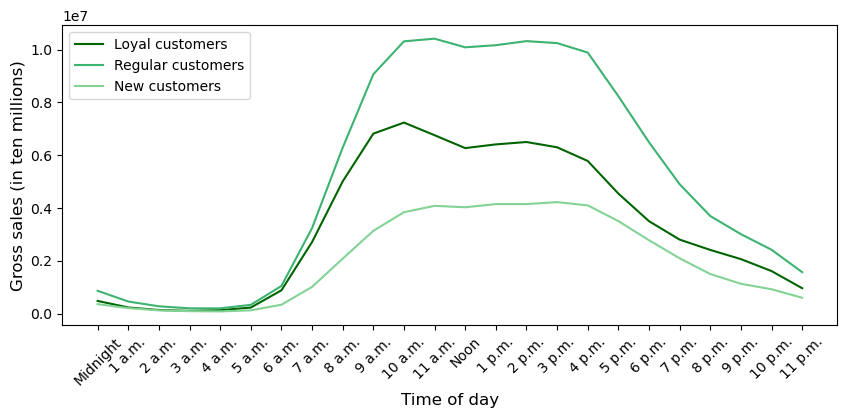

In [86]:

# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(10,5))

# Creating the plot
loy_hod_line = sns.lineplot(data= combo_loy_hod[['loy_total_dow', 'reg_total_dow', 'new_total_dow']], 
                            palette= ['darkgreen', 'mediumseagreen', '#83D396'], 
                            dashes = False )

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.legend(['Loyal customers', 'Regular customers', 'New customers'], 
           loc='upper left', ncol=1)
plt.xticks(hod_xticks, hod, rotation = 45)
plt.xlabel("Time of day", size = 12 )

plt.ylabel("Gross sales (in ten millions)", size = 12 )

#plt.title ("TBD.", size=16)

plt.show()

In [87]:
# Create filename for export
filename = profile+'_gross_hod.png'

In [88]:
filename

'loyalty_flag_gross_hod.png'

In [89]:
# Exporting bar chart
loy_hod_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

Compare loyalty status with frequency of shopping

In [47]:
# Create a cross tabulation to show the proportions of the 
# loyalty groups in each frequent_shopper category
cross_tab_loy_freq = pd.crosstab(index=df_user_subset['loyalty_flag'],
                            columns=df_user_subset['frequent_shopper'],
                            normalize='index')

In [48]:
cross_tab_loy_freq

frequent_shopper,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,1.00,0.00,0.00
New customer,0.23,0.45,0.31
Regular customer,0.55,0.08,0.38


In [49]:
cross_tab_loy_freq.shape

(3, 3)

In [50]:
# Rename columns to be less confusing
cross_tab_loy_freq.rename(columns={'Frequent customer':'Frequent shopper',
                                   'Non-frequent customer':'Infrequent shopper',
                                   'Regular customer':'Average shopper'}, 
                          inplace=True)

In [51]:
# I want to swap the order of the rows so that the 
# chart sequences bars correctly

# First reset the index to allow swapping the loyalty_flag as well
cross_tab_loy_freq = cross_tab_loy_freq.reset_index()

cross_tab_loy_freq

frequent_shopper,loyalty_flag,Frequent shopper,Infrequent shopper,Average shopper
0,Loyal customer,1.00,0.00,0.00
1,New customer,0.23,0.45,0.31
2,Regular customer,0.55,0.08,0.38


In [52]:
# Create a temp copy of the df
temp = pd.DataFrame()
temp = cross_tab_loy_freq.copy()
temp

frequent_shopper,loyalty_flag,Frequent shopper,Infrequent shopper,Average shopper
0,Loyal customer,1.00,0.00,0.00
1,New customer,0.23,0.45,0.31
2,Regular customer,0.55,0.08,0.38


In [53]:
# Swap the last two rows
cross_tab_loy_freq.iloc[1] = temp.iloc[2].copy()
cross_tab_loy_freq.iloc[2] = temp.iloc[1].copy()

In [54]:
cross_tab_loy_freq

frequent_shopper,loyalty_flag,Frequent shopper,Infrequent shopper,Average shopper
0,Loyal customer,1.00,0.00,0.00
1,Regular customer,0.55,0.08,0.38
2,New customer,0.23,0.45,0.31


In [55]:
# Return the index to being the loyalty_flag
cross_tab_loy_freq = cross_tab_loy_freq.set_index('loyalty_flag')
cross_tab_loy_freq

frequent_shopper,Frequent shopper,Infrequent shopper,Average shopper
loyalty_flag,,,
Loyal customer,1.00,0.00,0.00
Regular customer,0.55,0.08,0.38
New customer,0.23,0.45,0.31


In [56]:
# Transpose the table to 
cross_tab_loy_freq_t = cross_tab_loy_freq.transpose()
cross_tab_loy_freq_t

loyalty_flag,Loyal customer,Regular customer,New customer
frequent_shopper,,,
Frequent shopper,1.00,0.55,0.23
Infrequent shopper,0.00,0.08,0.45
Average shopper,0.00,0.38,0.31


In [57]:
# I want to swap the order of the rows so that the 
# chart sequences bars correctly

# First reset the index to allow swapping the loyalty_flag as well
cross_tab_loy_freq_t = cross_tab_loy_freq_t.reset_index()

cross_tab_loy_freq_t

loyalty_flag,frequent_shopper,Loyal customer,Regular customer,New customer
0,Frequent shopper,1.00,0.55,0.23
1,Infrequent shopper,0.00,0.08,0.45
2,Average shopper,0.00,0.38,0.31


In [58]:
# Create a temp copy of the df
temp = pd.DataFrame()
temp = cross_tab_loy_freq_t.copy()
temp

loyalty_flag,frequent_shopper,Loyal customer,Regular customer,New customer
0,Frequent shopper,1.00,0.55,0.23
1,Infrequent shopper,0.00,0.08,0.45
2,Average shopper,0.00,0.38,0.31


In [59]:
# Swap the last two rows
cross_tab_loy_freq_t.iloc[1] = temp.iloc[2].copy()
cross_tab_loy_freq_t.iloc[2] = temp.iloc[1].copy()

In [60]:
cross_tab_loy_freq_t

loyalty_flag,frequent_shopper,Loyal customer,Regular customer,New customer
0,Frequent shopper,1.00,0.55,0.23
1,Average shopper,0.00,0.38,0.31
2,Infrequent shopper,0.00,0.08,0.45


In [61]:
# Return the index to being the frequent_shopper
cross_tab_loy_freq_t = cross_tab_loy_freq_t.set_index('frequent_shopper')

In [62]:
cross_tab_loy_freq_t

loyalty_flag,Loyal customer,Regular customer,New customer
frequent_shopper,,,
Frequent shopper,1.00,0.55,0.23
Average shopper,0.00,0.38,0.31
Infrequent shopper,0.00,0.08,0.45


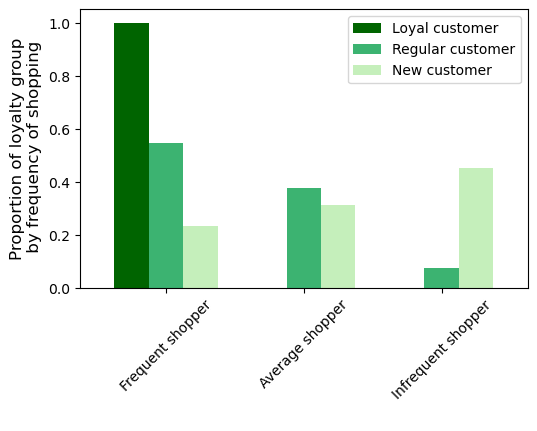

In [157]:
# Create a bar chart showing when different loyalty groups shop most often
freq_bar_by_loyalty = cross_tab_loy_freq_t.plot(kind='bar', width=0.75, color = colors_dec)

# Format margins so it isn't too crowded
plt.subplots_adjust(bottom=0.3)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity
plt.ylabel('Proportion of loyalty group\n by frequency of shopping', size=12)
plt.xticks(rotation = 45)
plt.xlabel(" ")
plt.xticks(rotation=45)
plt.legend(labels = labels_dec)
#plt.title ("TBD.\n TBD\n", size=14)

plt.show()

In [158]:
# Create filename for export
filename = profile+'_freq_bar.png'
filename

'loyalty_flag_freq_bar.png'

In [159]:
# Exporting bar chart
freq_bar_by_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [70]:
df_user_subset.groupby('loyalty_flag').median_days_since_ordering.median()

loyalty_flag
Loyal customer      5.00
New customer       19.00
Regular customer   10.00
Name: median_days_since_ordering, dtype: float16

In [71]:
df_user_subset.groupby('loyalty_flag').median_days_since_ordering.mean()

loyalty_flag
Loyal customer      5.02
New customer       18.73
Regular customer   11.09
Name: median_days_since_ordering, dtype: float16

In [72]:
cross_tab_freq_loy = pd.crosstab(index=df_user_subset['frequent_shopper'],
                            columns=df_user_subset['loyalty_flag'],
                            normalize='index')

In [73]:
cross_tab_freq_loy

loyalty_flag,Loyal customer,New customer,Regular customer
frequent_shopper,,,
Frequent customer,0.20,0.31,0.49
Non-frequent customer,0.00,0.90,0.10
Regular customer,0.00,0.55,0.45


In [160]:
# Identify the average order size & avg order amount

In [161]:
# Create a temp df to explore average amount spent per order
loyalty_avg_order_spend = pd.DataFrame(df_order_subset.groupby(profile).total_spent_in_order.mean())
loyalty_avg_order_spend

,total_spent_in_order
loyalty_flag,
Loyal customer,78.02
New customer,76.44
Regular customer,79.70


In [162]:
loyalty_avg_order_items = pd.DataFrame(df_order_subset.groupby(profile).n_items_in_order.mean())
loyalty_avg_order_items

,n_items_in_order
loyalty_flag,
Loyal customer,10.05
New customer,9.81
Regular customer,10.23


In [168]:
# Check income_group by loyalty_status
income_loy = pd.crosstab(index=df_user_subset['income_group'],
                            columns=df_user_subset[profile],
                            normalize='index')
income_loy

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Affluent,0.15,0.34,0.51
Low income,0.06,0.61,0.33
Middle class,0.09,0.53,0.38
Upper middle class,0.09,0.52,0.39


In [169]:
# Check loyalty status by income_group
loy_income = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['income_group'],
                            normalize='index')

In [170]:
loy_income

income_group,Affluent,Low income,Middle class,Upper middle class
loyalty_flag,,,,
Loyal customer,0.01,0.12,0.75,0.12
New customer,0.00,0.19,0.71,0.10
Regular customer,0.00,0.14,0.74,0.12


In [171]:
# Check loyalty status by gender
loy_gender = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['gender'],
                            normalize='index')
loy_gender

gender,Female,Male
loyalty_flag,,
Loyal customer,0.49,0.51
New customer,0.49,0.51
Regular customer,0.50,0.50


In [174]:
# Check loyalty status by fam_status
loy_fam = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['fam_status'],
                            normalize='index')
loy_fam

fam_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,0.09,0.05,0.70,0.17
New customer,0.09,0.05,0.70,0.17
Regular customer,0.09,0.05,0.70,0.16
